Creating output file that is 1647P x 3388L.
Processing /var/folders/mg/hz10g1l14916bvkqvy7r1fg40000gn/T/terrain-tiles-l0ej566n/merge.vrt [1/1] : 0Using internal nodata values (e.g. -32768) for image /var/folders/mg/hz10g1l14916bvkqvy7r1fg40000gn/T/terrain-tiles-l0ej566n/merge.vrt.
...10...20...30...40...50...60...70...80...90...100 - done.


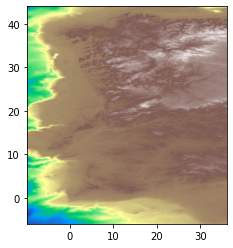

In [1]:
from matplotlib import pyplot as plt
import rasterio

from terraincache import TerrainTiles

bounds =[-9.888,36,-6,43.999]
# bounds =[-16.091667, 29.950000000000003, -8.208333, 42.24166666666667]

# Initialize with bounds and zoom of interest
tt = TerrainTiles(bounds, 8)

# load to numpy array
array = tt.load()

# plot the array directlya
plt.imshow(array, cmap='terrain', extent=bounds)

#[-125.2714, 51.3706, -125.2547, 51.3768]

In [2]:
# 42.154058, -8.198415)

In [3]:
# south 36.960158, -7.887096 

ERROR 1: Output dataset dem.tif exists,
but some command line options were provided indicating a new dataset
should be created.  Please delete existing dataset and run again.



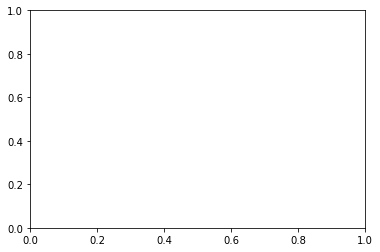

In [4]:
tt.save(out_file="dem.tif")
with rasterio.open("dem.tif", "r") as src:
    fig, ax = plt.subplots()

In [5]:
import georasters as gr
from osgeo import gdal

topo = gr.from_file('/Users/luismoreira/dem.tif')

<AxesSubplot:>

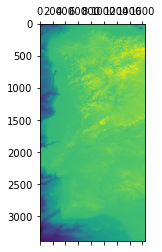

In [6]:
topo.plot()

In [7]:
topo = topo.to_pandas()

In [8]:
topo['value'].max() - topo['value'].min()

7001

In [9]:
topo_filtered = topo[topo['value'] >= 0]

In [10]:
topo_filtered['y'].min()

36.17707349468713

In [11]:
#topo_filtered[topo_filtered['x']]# 

# Solar 

In [40]:
solar = gr.from_file('/Users/luismoreira/Downloads/Portugal_GISdata_LTAy_YearlyMonthlyTotals_GlobalSolarAtlas-v2_GEOTIFF/PVOUT.tif')

<AxesSubplot:>

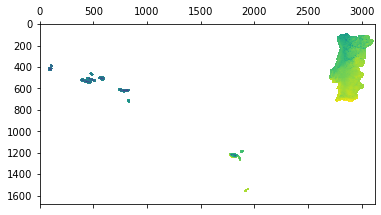

In [13]:
solar.plot()

In [41]:
solar = solar.to_pandas()

In [42]:
solar_long_filt = solar[(solar['x'] <= -6) & (solar['x'] >= -9.5)]

In [43]:
solar_lat_filt = solar_long_filt[(solar_long_filt['y'] <= 44) & (solar_long_filt['y'] >= 36)]

In [44]:
solar_final = solar_lat_filt.copy()

In [45]:
solar_final.shape

(162682, 5)

In [46]:
solar_final.head()

,row,col,value,x,y
0,91,2855,1397.446045,-8.208333,42.241667
1,91,2856,1371.879028,-8.200000,42.241667
2,91,2857,1366.765991,-8.191667,42.241667
3,92,2850,1408.038940,-8.250000,42.233333
4,92,2851,1403.656006,-8.241667,42.233333


In [47]:
solar

,row,col,value,x,y
0,91,2855,1397.446045,-8.208333,42.241667
1,91,2856,1371.879028,-8.200000,42.241667
2,91,2857,1366.765991,-8.191667,42.241667
3,92,2850,1408.038940,-8.250000,42.233333
4,92,2851,1403.656006,-8.241667,42.233333
...,...,...,...,...,...
185077,1566,1915,1655.677979,-16.041667,29.950000
185078,1566,1916,1655.677979,-16.033333,29.950000
185079,1566,1917,1655.677979,-16.025000,29.950000
185080,1566,1918,1655.677979,-16.016667,29.950000


# Preprocessing

## Solar

In [48]:
solar_final['x'].max()

-6.066666666666666

In [49]:
solar_final['x'].min()

-9.5

In [50]:
solar_final['y'].max()

42.24166666666667

In [51]:
solar_final['y'].min()

36.875

In [52]:
solar_final

,row,col,value,x,y
0,91,2855,1397.446045,-8.208333,42.241667
1,91,2856,1371.879028,-8.200000,42.241667
2,91,2857,1366.765991,-8.191667,42.241667
3,92,2850,1408.038940,-8.250000,42.233333
4,92,2851,1403.656006,-8.241667,42.233333
...,...,...,...,...,...
178599,734,2896,1756.852051,-7.866667,36.883333
178600,734,2897,1756.487061,-7.858333,36.883333
178601,734,2898,1756.487061,-7.850000,36.883333
178602,734,2899,1756.487061,-7.841667,36.883333


('South', 'Upper_south', 'Centre', 'Upper_Centre', 'North', 'Upper_North')

In [77]:
import pandas as pd

long_labels= ["Coastline","Interior_left","Interior_right", "Border"]
solar_final["long_position"] = pd.cut(solar_final["x"],4, labels = long_labels)

lat_labels= ["South","Upper_south","Centre","Upper_Centre", "North","Upper_North"]
solar_final["lat_position"] = pd.cut(solar_final["y"],6, labels = lat_labels)

In [78]:
solar_final.dtypes

row                 int64
col                 int64
value             float32
x                 float64
y                 float64
long_position    category
lat_position     category
dtype: object

In [79]:
solar_final

,row,col,value,x,y,long_position,lat_position
0,91,2855,1397.446045,-8.208333,42.241667,Interior_left,Upper_North
1,91,2856,1371.879028,-8.200000,42.241667,Interior_left,Upper_North
2,91,2857,1366.765991,-8.191667,42.241667,Interior_left,Upper_North
3,92,2850,1408.038940,-8.250000,42.233333,Interior_left,Upper_North
4,92,2851,1403.656006,-8.241667,42.233333,Interior_left,Upper_North
...,...,...,...,...,...,...,...
178599,734,2896,1756.852051,-7.866667,36.883333,Interior_left,South
178600,734,2897,1756.487061,-7.858333,36.883333,Interior_left,South
178601,734,2898,1756.487061,-7.850000,36.883333,Interior_left,South
178602,734,2899,1756.487061,-7.841667,36.883333,Interior_left,South


In [80]:
by_square = solar_final.groupby(["long_position","lat_position"]).agg({"value":'mean'})

In [81]:
by_square

value
long_position  lat_position             
Coastline      South         1690.208130
               Upper_south   1661.503174
               Centre        1568.003174
               Upper_Centre  1526.365234
               North         1517.614990
               Upper_North   1470.199707
Interior_left  South         1673.719971
               Upper_south   1636.641357
               Centre        1594.420288
               Upper_Centre  1526.087646
               North         1490.088867
               Upper_North   1438.886353
Interior_right South         1674.179443
               Upper_south   1645.066162
               Centre        1640.804443
               Upper_Centre  1619.709839
               North         1553.715454
               Upper_North   1518.566772
Border         South                 NaN
               Upper_south   1637.951416
               Centre        1654.858521
               Upper_Centre  1626.230347
               North         1571.572510
               Upper_North   1563.958618

In [82]:
by_square[by_square['value'] == 1690.2081298828125]

,,value
long_position,lat_position,
Coastline,South,1690.20813


In [83]:
by_square['value'].sort_values(ascending=False)

long_position   lat_position
Coastline       South           1690.208130
Interior_right  South           1674.179443
Interior_left   South           1673.719971
Coastline       Upper_south     1661.503174
Border          Centre          1654.858521
Interior_right  Upper_south     1645.066162
                Centre          1640.804443
Border          Upper_south     1637.951416
Interior_left   Upper_south     1636.641357
Border          Upper_Centre    1626.230347
Interior_right  Upper_Centre    1619.709839
Interior_left   Centre          1594.420288
Border          North           1571.572510
Coastline       Centre          1568.003174
Border          Upper_North     1563.958618
Interior_right  North           1553.715454
Coastline       Upper_Centre    1526.365234
Interior_left   Upper_Centre    1526.087646
Interior_right  Upper_North     1518.566772
Coastline       North           1517.614990
Interior_left   North           1490.088867
Coastline       Upper_North     1470.199707
Int

# Topography